In [1]:
import json
from urllib import request, parse
from multiprocessing import Pool
from itertools import chain

In [2]:
def link_to_title(link):
    return link["title"]

def clean_if_key(page, key):
    if key in page.keys():
        return map(link_to_title, page[key])
    else:
        return []

In [3]:
def get_wiki_links(page_title):
    safe_title = parse.quote(page_title)
    url = "https://en.wikipedia.org/w/api.php?action=query&prop=links|linkshere&pllimit=10&lhlimit=10&titles={}&format=json&formatversion=2".format(safe_title)
    page = request.urlopen(url).read()
    j = json.loads(page)
    jpage = j["query"]["pages"][0]
    inbound = clean_if_key(jpage, "links")
    outbound = clean_if_key(jpage, "linkshere")
    return {
        "title": page_title,
        "in-links": list(inbound),
        "out-links": list(outbound),
    }

In [4]:
root = get_wiki_links("Parallel_computing")

In [5]:
def flattern_network(page):
    return page["in-links"]+page["out-links"]

In [6]:
initial_network = flattern_network(root)

In [7]:
def page_to_edge(page):
    out_links = [(page["title"], p) for p in page["out-links"]]
    in_links = [(page["title"], p) for p in page["in-links"]]
    return out_links + in_links

In [8]:
with Pool() as p:
    all_pages = p.map(get_wiki_links, initial_network)
    edges = p.map(page_to_edge, all_pages)

In [9]:
edges

[[('16-bit', 'Amiga'),
  ('16-bit', 'Apple II series'),
  ('16-bit', 'Atari ST'),
  ('16-bit', 'Advanced Micro Devices'),
  ('16-bit', 'Athlon'),
  ('16-bit', 'Amiga 500'),
  ('16-bit', 'Amiga 1000'),
  ('16-bit', 'Amiga 500 Plus'),
  ('16-bit', 'Commodore 64'),
  ('16-bit', 'Digital Equipment Corporation'),
  ('16-bit', '16-bit computing'),
  ('16-bit', 'Wikipedia:Protection policy'),
  ('16-bit', 'Wikipedia:Redirect'),
  ('16-bit', 'Category:Redirects from moves')],
 [('4-bit', 'Advanced Micro Devices'),
  ('4-bit', 'Intel'),
  ('4-bit', 'Intel 80286'),
  ('4-bit', 'Intel 8080'),
  ('4-bit', 'Intel 8086'),
  ('4-bit', 'Intel 8088'),
  ('4-bit', 'I386'),
  ('4-bit', 'I486'),
  ('4-bit', 'Intel 80486SX'),
  ('4-bit', 'Intel 80186'),
  ('4-bit', '4-bit computing'),
  ('4-bit', 'Wikipedia:Protection policy'),
  ('4-bit', 'Wikipedia:Redirect'),
  ('4-bit', 'Category:Redirects from moves')],
 [('64-bit', 'Accelerated Graphics Port'),
  ('64-bit', 'Advanced Micro Devices'),
  ('64-bit', 'At

In [10]:
edges = chain.from_iterable(edges)

### Visualização

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
G = nx.DiGraph()

In [13]:
for e in edges:
    G.add_edge(*e)
nx.readwrite.gexf.write_gexf(G, "./my_graph.gexf")

In [14]:
G

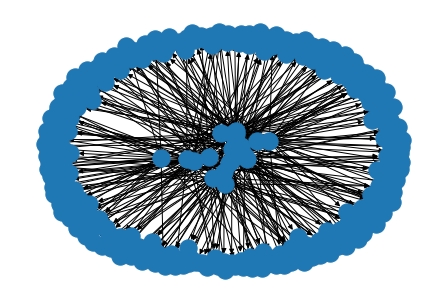

In [15]:
nx.draw(G)
plt.show()